In [1]:
pip install scikit-learn pandas matplotlib joblib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [5]:
print("Dataset Shape:", X.shape)


Dataset Shape: (569, 30)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

results = []

In [9]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Train and Test Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


Training Logistic Regression...

Training Decision Tree...

Training Random Forest...

Training SVM...


In [10]:
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(results_df)



Model Comparison Table:

                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.989011       0.982456   0.986111  0.986111   
1        Decision Tree        1.000000       0.912281   0.955882  0.902778   
2        Random Forest        1.000000       0.956140   0.958904  0.972222   
3                  SVM        0.982418       0.982456   0.986111  0.986111   

   F1-Score  
0  0.986111  
1  0.928571  
2  0.965517  
3  0.986111  


In [11]:
results_df.to_csv("model_comparison_results.csv", index=False)

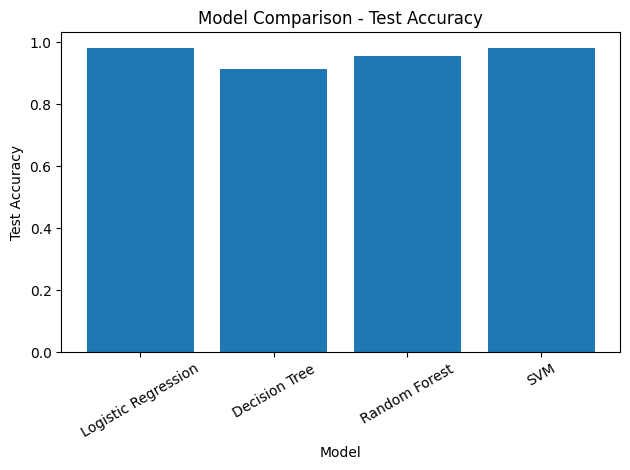

In [12]:
plt.figure()
plt.bar(results_df["Model"], results_df["Test Accuracy"])
plt.title("Model Comparison - Test Accuracy")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("model_comparison_plot.png")
plt.show()


In [13]:
results_df["Overfitting Gap"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]
print("\nGeneralization (Train - Test Accuracy):\n")
print(results_df[["Model", "Overfitting Gap"]])



Generalization (Train - Test Accuracy):

                 Model  Overfitting Gap
0  Logistic Regression         0.006555
1        Decision Tree         0.087719
2        Random Forest         0.043860
3                  SVM        -0.000039


In [14]:
best_model_row = results_df.sort_values(by="F1-Score", ascending=False).iloc[0]
best_model_name = best_model_row["Model"]

print(f"\n✅ Best Model Selected: {best_model_name}")

best_model = models[best_model_name]



✅ Best Model Selected: Logistic Regression


In [15]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nBest model and scaler saved successfully!")


Best model and scaler saved successfully!
